### Supervised Machine Learning Model
##### Rick Gosalvez, Spring 2020

# Predicting King County, WA Housing Prices

Find, clean, prepare, load, model external dataset for use with scikit-learn machine learning model.

#### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

#### View scikit-learn datasets

In [2]:
# from sklearn import datasets
# dir(datasets)

#### Load the dataset into pandas dataframe and view characteristics

In [3]:
df = pd.read_csv("kc_house_data.csv", header=0)
pd.set_option('precision', 2)  # format for floating-point values
df.shape

(21613, 21)

In [4]:
# check for non-numeric types, scikitlearn cannot have non-numerics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [6]:
del df['id']         # id deleted to clean data as it is not a numeric used for regression

In [7]:
print(f"King's County Max Housing Price: {max(df['price']):.0f}")
print(f"Value of all Sales: {sum(df['price']):.0f}")

King's County Max Housing Price: 7700000
Value of all Sales: 11672925008


## Remove all non-numeric data columns

REUSABLE code to prepare other external datasets for scikit-learn

In [8]:
# Creating clean dataset (numeric only) to then 'load into' scikit-learn

# put the original column names in a python list
original_headers = list(df.columns.values)

# remove the non-numeric columns
df = df._get_numeric_data()

# put the numeric column names in a python list
numeric_headers = list(df.columns.values)

# create a numpy array with the numeric values for input into scikit-learn
numpy_array = df.values

# reverse the order of the columns
numeric_headers.reverse()
reverse_df = df[numeric_headers]

# write the reverse_df to an excel spreadsheet
reverse_df.to_csv('clean_kc_housing.csv', index=False)

#### Load cleaned dataset into pandas dataframe and view characteristics

In [9]:
df2 = pd.read_csv("clean_kc_housing.csv", header=0)
pd.set_option('precision', 2)  # format for floating-point values
df2.shape

(21613, 19)

In [10]:
df2.head()

,sqft_lot15,sqft_living15,long,lat,zipcode,yr_renovated,yr_built,sqft_basement,sqft_above,grade,condition,view,waterfront,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
0,5650,1340,-122.26,47.51,98178,0,1955,0,1180,7,3,0,0,1.0,5650,1180,1.00,3,221900.0
1,7639,1690,-122.32,47.72,98125,1991,1951,400,2170,7,3,0,0,2.0,7242,2570,2.25,3,538000.0
2,8062,2720,-122.23,47.74,98028,0,1933,0,770,6,3,0,0,1.0,10000,770,1.00,2,180000.0
3,5000,1360,-122.39,47.52,98136,0,1965,910,1050,7,5,0,0,1.0,5000,1960,3.00,4,604000.0
4,7503,1800,-122.05,47.62,98074,0,1987,0,1680,8,3,0,0,1.0,8080,1680,2.00,3,510000.0


In [11]:
df2.describe()

,sqft_lot15,sqft_living15,long,lat,zipcode,yr_renovated,yr_built,sqft_basement,sqft_above,grade,condition,view,waterfront,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,2.16e+04,21613.00,2.16e+04,21613.00,21613.00,21613.00,2.16e+04
mean,12768.46,1986.55,-122.21,47.56,98077.94,84.40,1971.01,291.51,1788.39,7.66,3.41,0.23,7.54e-03,1.49,1.51e+04,2079.90,2.11,3.37,5.40e+05
std,27304.18,685.39,0.14,0.14,53.51,401.68,29.37,442.58,828.09,1.18,0.65,0.77,8.65e-02,0.54,4.14e+04,918.44,0.77,0.93,3.67e+05
min,651.00,399.00,-122.52,47.16,98001.00,0.00,1900.00,0.00,290.00,1.00,1.00,0.00,0.00e+00,1.00,5.20e+02,290.00,0.00,0.00,7.50e+04
25%,5100.00,1490.00,-122.33,47.47,98033.00,0.00,1951.00,0.00,1190.00,7.00,3.00,0.00,0.00e+00,1.00,5.04e+03,1427.00,1.75,3.00,3.22e+05
50%,7620.00,1840.00,-122.23,47.57,98065.00,0.00,1975.00,0.00,1560.00,7.00,3.00,0.00,0.00e+00,1.50,7.62e+03,1910.00,2.25,3.00,4.50e+05
75%,10083.00,2360.00,-122.12,47.68,98118.00,0.00,1997.00,560.00,2210.00,8.00,4.00,0.00,0.00e+00,2.00,1.07e+04,2550.00,2.50,4.00,6.45e+05
max,871200.00,6210.00,-121.31,47.78,98199.00,2015.00,2015.00,4820.00,9410.00,13.00,5.00,4.00,1.00e+00,3.50,1.65e+06,13540.00,8.00,33.00,7.70e+06


## Load external dataset into scikit-learn

REUSABLE function (code) to prepare other external datasets for scikit-learn.

This example has file in same directory as notebook!

UPDATE: file name, n_sample, n_features, feature_names, target_names

'n_sample' and 'n_features' from .shape() data characteristics (records and columns)

'feature_names' and 'target_names' should be column (attribute) names. 'feature_names' are independent variables. 'target_names' are all variables.

the 'target' variable is the 'dependent regression variable', in this case 'price'

In [12]:
import csv
from sklearn.datasets.base import Bunch

def load_new_dataset():
    with open('clean_kc_housing.csv') as csv_file:     # specify name of file in directory
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 21613               #number of data rows, don't count header
        n_features = 18                 #number of columns for features, don't count target column 
        feature_names = ['sqft_lot15', 'sqft_living15', 'long', 'lat','zipcode', 'yr_renovated', 'yr_built','sqft_basement','sqft_above','grade', 'condition','view','waterfront','floors' ,'sqft_lot', 'sqft_living', 'bathrooms','bedrooms'] 
        target_names = ['sqft_lot15', 'sqft_living15', 'long', 'lat','zipcode', 'yr_renovated', 'yr_built','sqft_basement','sqft_above','grade', 'condition','view','waterfront','floors' ,'sqft_lot', 'sqft_living', 'bathrooms','bedrooms','price'] #adjust accordingly
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, sample in enumerate(data_file):
            data[i] = np.asarray(sample[:-1], dtype=np.float64)
            target[i] = np.asarray(sample[-1], dtype=np.float64)

    return Bunch(data=data, target=target, feature_names = feature_names, target_names = target_names)

data = load_new_dataset()

## Create scikit-learn dataset object

The following steps are modeled after CaliforniaHousing.ipynb template.

In [13]:
# Call reusable code function to create a scikit-learn data object
kc_housing = load_new_dataset()

In [14]:
# data = independent variables
# target = values you are trying to predict (e.g. y value)

print(f'  Data shape = {kc_housing.data.shape}')
print(f'Target shape = {kc_housing.target.shape}')

  Data shape = (21613, 18)
Target shape = (21613,)


In [15]:
kc_housing.target_names    # NOTE: price is in the dataset as target, but not in part of the shape as it is the 'dependent variable'

['sqft_lot15',
 'sqft_living15',
 'long',
 'lat',
 'zipcode',
 'yr_renovated',
 'yr_built',
 'sqft_basement',
 'sqft_above',
 'grade',
 'condition',
 'view',
 'waterfront',
 'floors',
 'sqft_lot',
 'sqft_living',
 'bathrooms',
 'bedrooms',
 'price']

### Load data into a dataframe and explore

In [16]:
kc_housing_df = pd.DataFrame(kc_housing.data, columns=kc_housing.feature_names)
kc_housing_df['price'] = pd.Series(kc_housing.target)
max(kc_housing_df['price'])

7700000

### Explore

In [17]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 19)
pd.set_option('display.width', None)

kc_housing_df.head()

,sqft_lot15,sqft_living15,long,lat,zipcode,yr_renovated,yr_built,sqft_basement,sqft_above,grade,condition,view,waterfront,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
0,5650.0,1340.0,-122.257,47.5112,98178.0,0.0,1955.0,0.0,1180.0,7.0,3.0,0.0,0.0,1.0,5650.0,1180.0,1.00,3.0,221900
1,7639.0,1690.0,-122.319,47.7210,98125.0,1991.0,1951.0,400.0,2170.0,7.0,3.0,0.0,0.0,2.0,7242.0,2570.0,2.25,3.0,538000
2,8062.0,2720.0,-122.233,47.7379,98028.0,0.0,1933.0,0.0,770.0,6.0,3.0,0.0,0.0,1.0,10000.0,770.0,1.00,2.0,180000
3,5000.0,1360.0,-122.393,47.5208,98136.0,0.0,1965.0,910.0,1050.0,7.0,5.0,0.0,0.0,1.0,5000.0,1960.0,3.00,4.0,604000
4,7503.0,1800.0,-122.045,47.6168,98074.0,0.0,1987.0,0.0,1680.0,8.0,3.0,0.0,0.0,1.0,8080.0,1680.0,2.00,3.0,510000


In [18]:
kc_housing_df.describe()

,sqft_lot15,sqft_living15,long,lat,zipcode,yr_renovated,yr_built,sqft_basement,sqft_above,grade,condition,view,waterfront,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
count,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,2.1613e+04,21613.0000,21613.0000,21613.0000,2.1613e+04
mean,12768.4557,1986.5525,-122.2139,47.5601,98077.9398,84.4023,1971.0051,291.509,1788.3907,7.6569,3.4094,0.2343,0.0075,1.4943,1.5107e+04,2079.8997,2.1148,3.3708,5.4009e+05
std,27304.1796,685.3913,0.1408,0.1386,53.5050,401.6792,29.3734,442.575,828.0910,1.1755,0.6507,0.7663,0.0865,0.5400,4.1421e+04,918.4409,0.7702,0.9301,3.6713e+05
min,651.0000,399.0000,-122.5190,47.1559,98001.0000,0.0000,1900.0000,0.000,290.0000,1.0000,1.0000,0.0000,0.0000,1.0000,5.2000e+02,290.0000,0.0000,0.0000,7.5000e+04
25%,5100.0000,1490.0000,-122.3280,47.4710,98033.0000,0.0000,1951.0000,0.000,1190.0000,7.0000,3.0000,0.0000,0.0000,1.0000,5.0400e+03,1427.0000,1.7500,3.0000,3.2195e+05
50%,7620.0000,1840.0000,-122.2300,47.5718,98065.0000,0.0000,1975.0000,0.000,1560.0000,7.0000,3.0000,0.0000,0.0000,1.5000,7.6180e+03,1910.0000,2.2500,3.0000,4.5000e+05
75%,10083.0000,2360.0000,-122.1250,47.6780,98118.0000,0.0000,1997.0000,560.000,2210.0000,8.0000,4.0000,0.0000,0.0000,2.0000,1.0688e+04,2550.0000,2.5000,4.0000,6.4500e+05
max,871200.0000,6210.0000,-121.3150,47.7776,98199.0000,2015.0000,2015.0000,4820.000,9410.0000,13.0000,5.0000,4.0000,1.0000,3.5000,1.6514e+06,13540.0000,8.0000,33.0000,7.7000e+06


#### Random sample (10%)

In [19]:
sample_df = kc_housing_df.sample(frac=0.1, random_state=17)

In [20]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

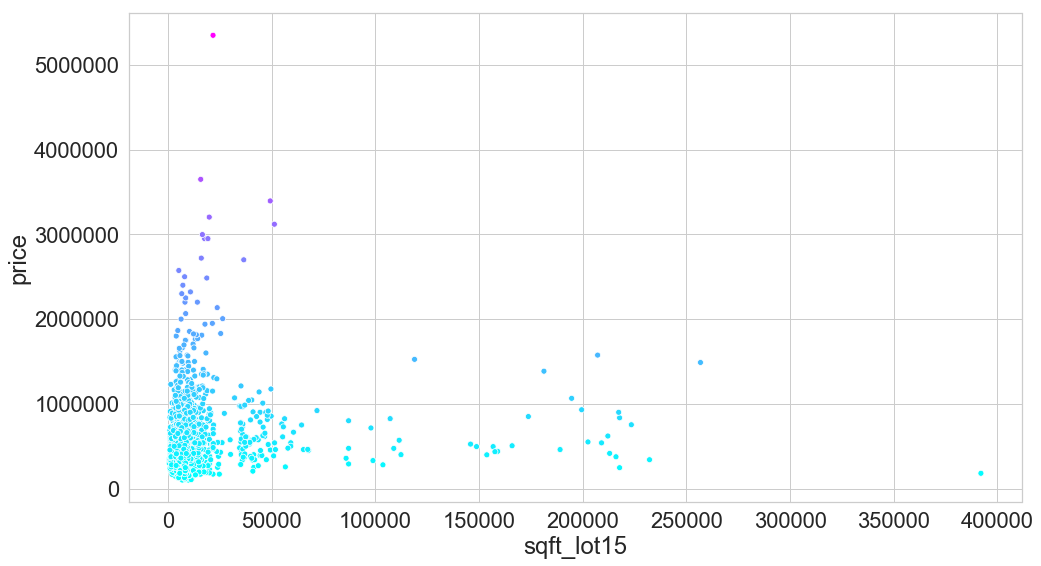

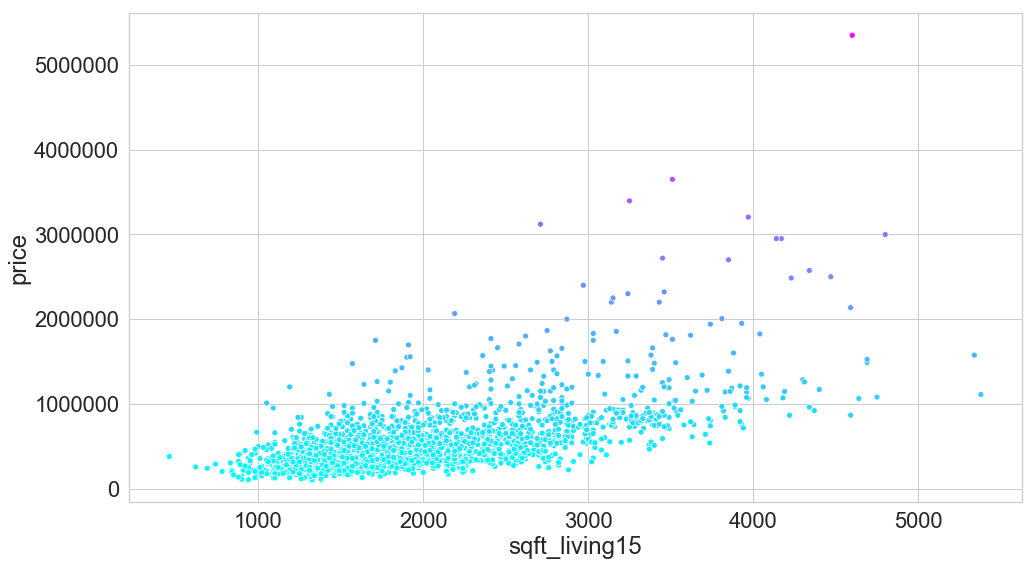

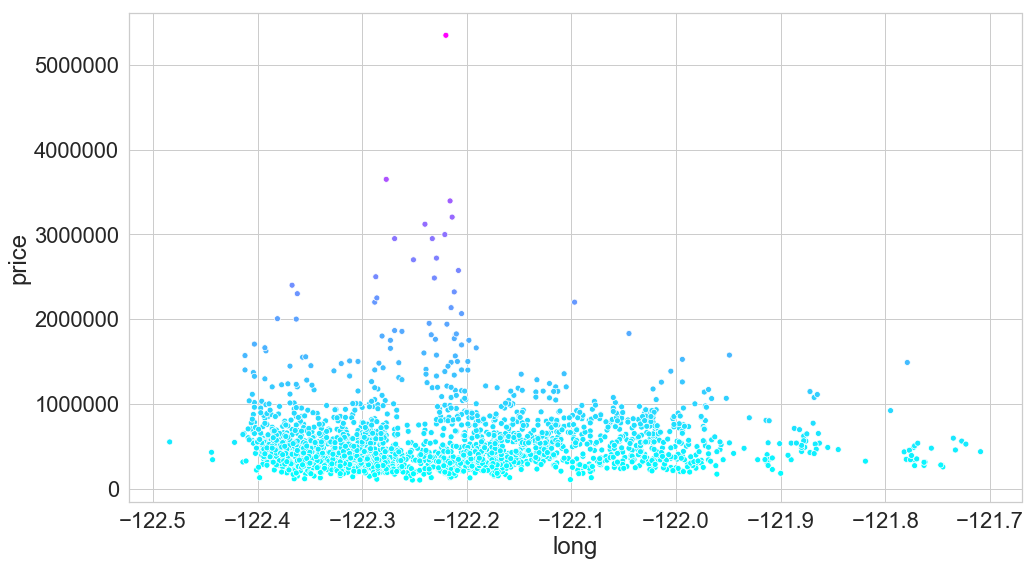

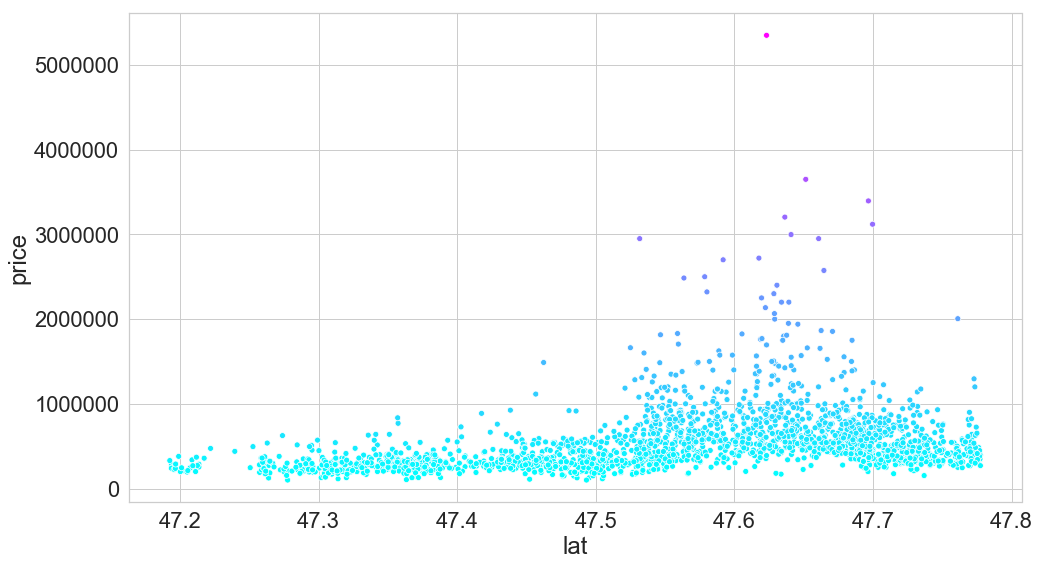

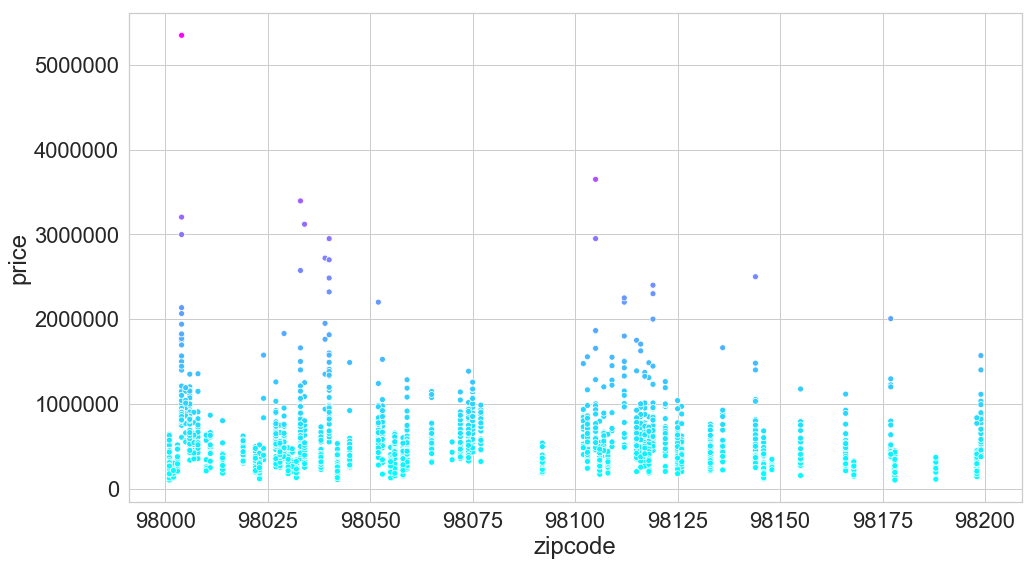

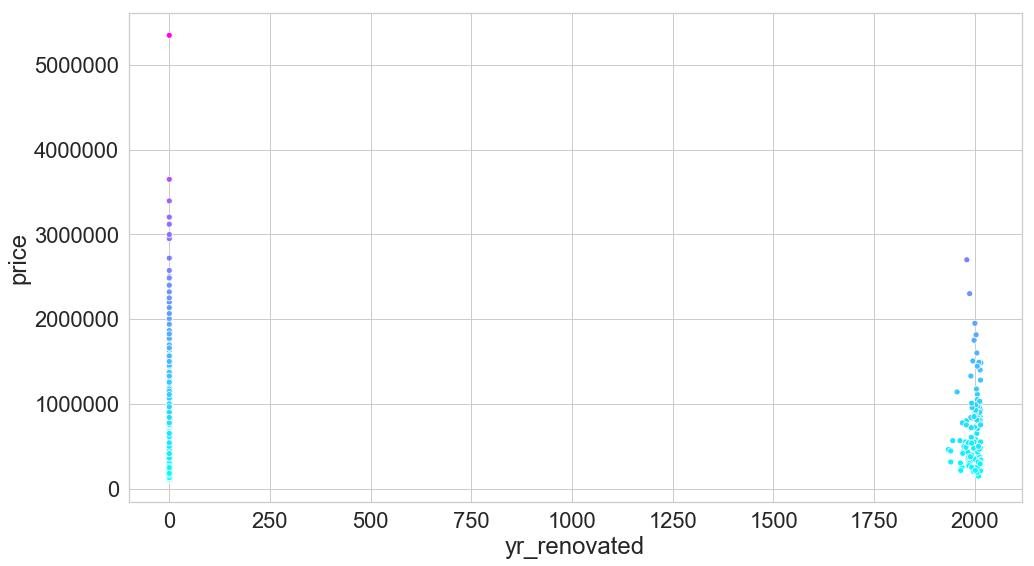

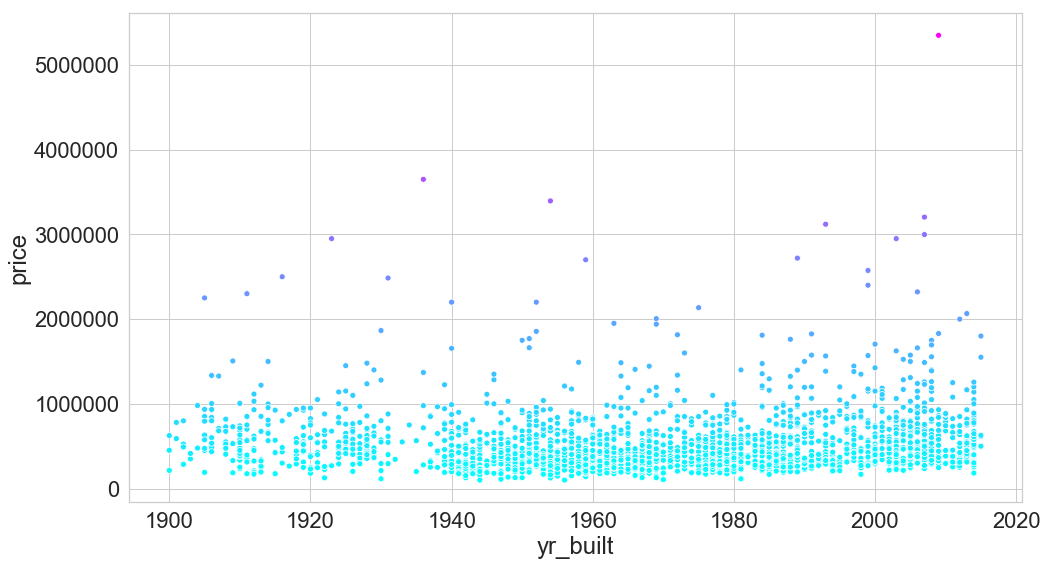

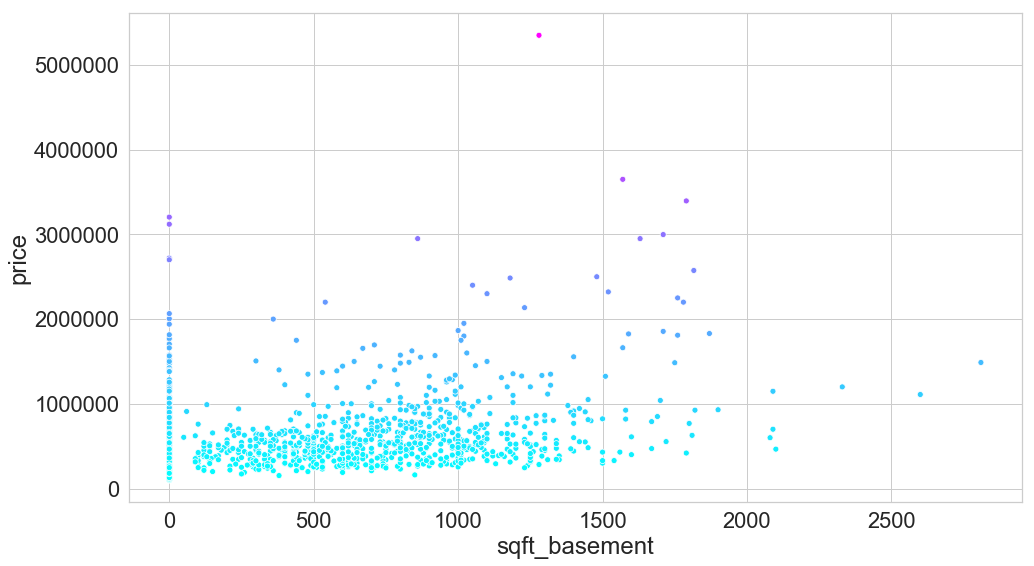

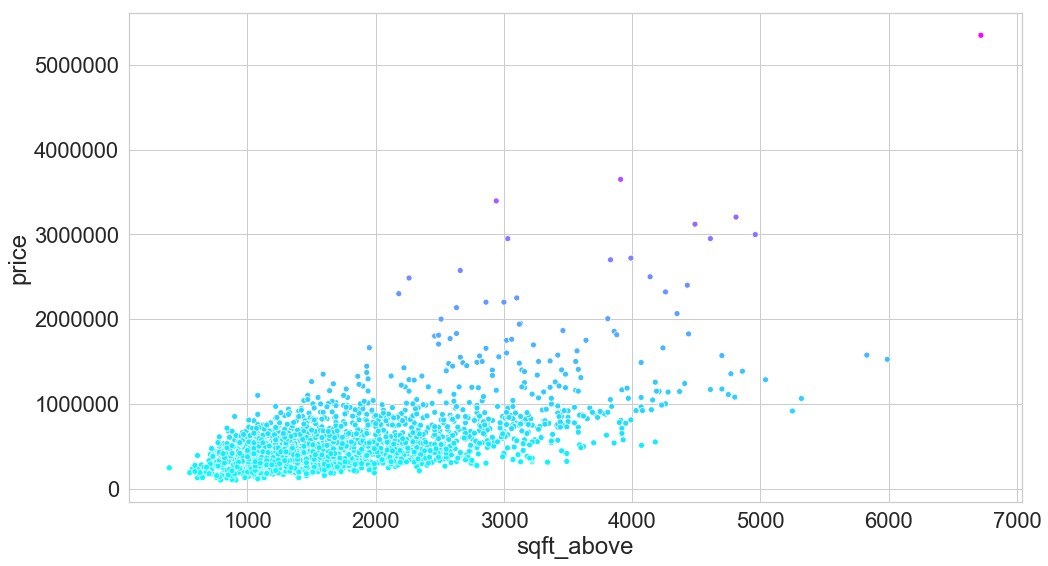

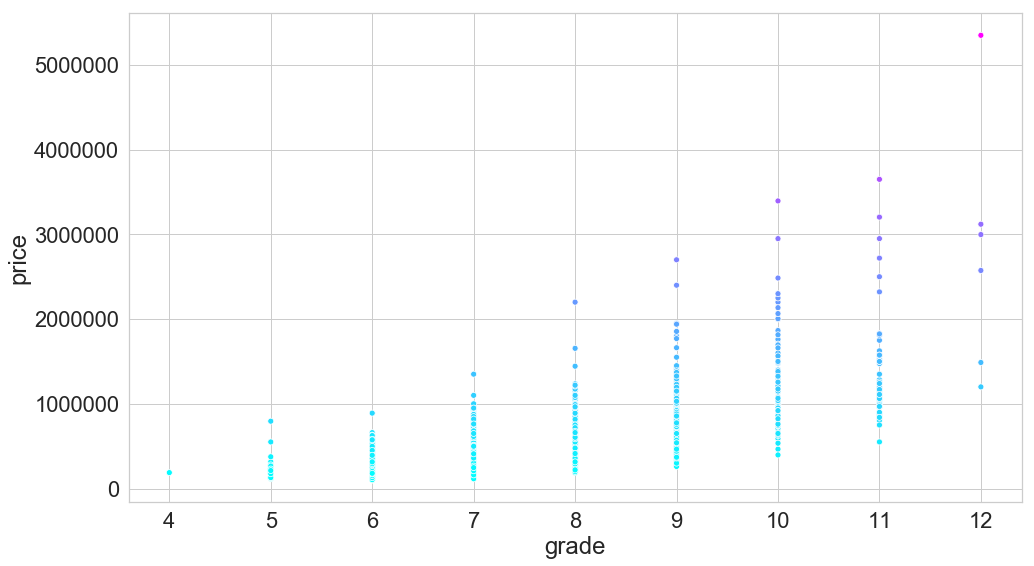

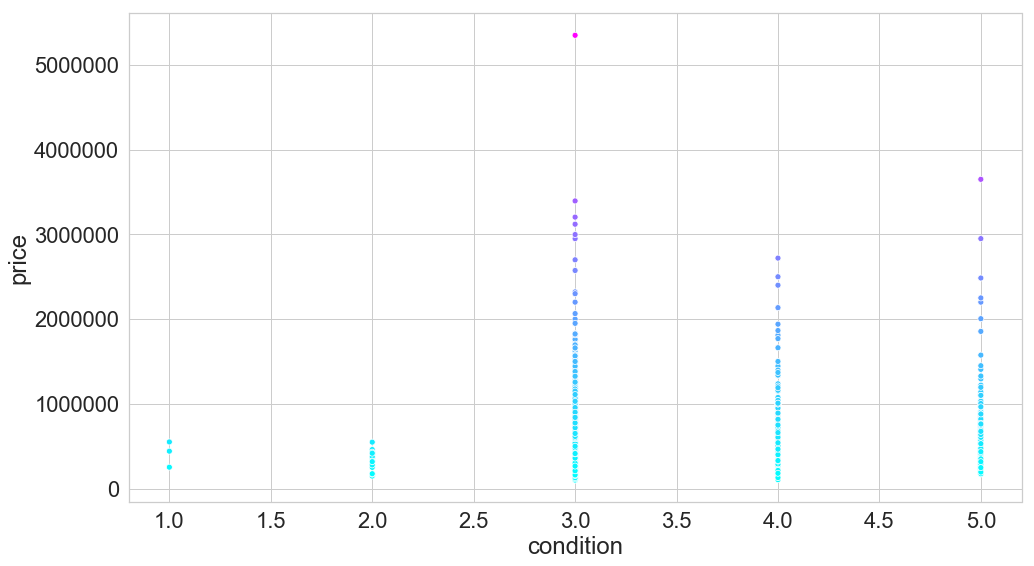

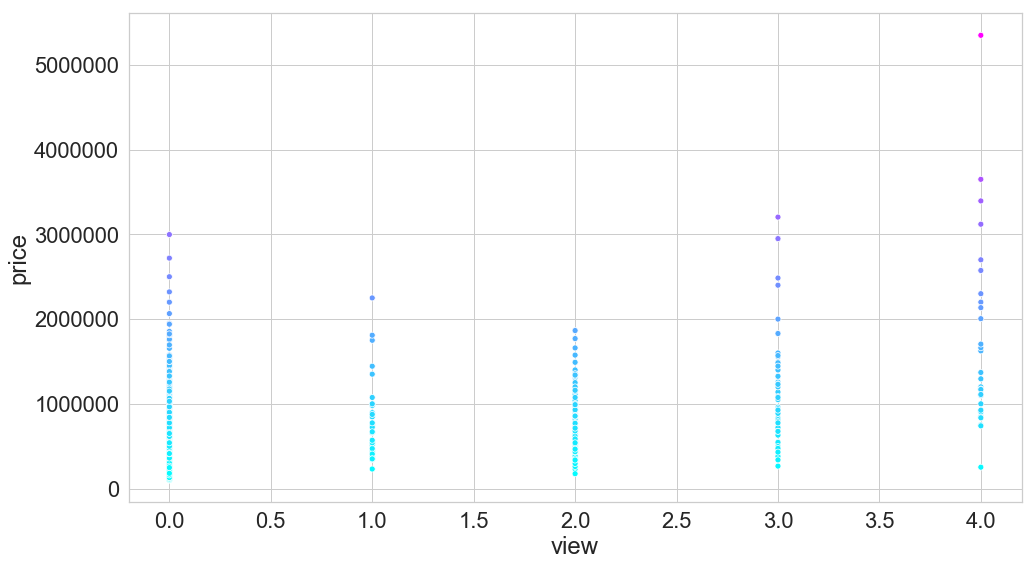

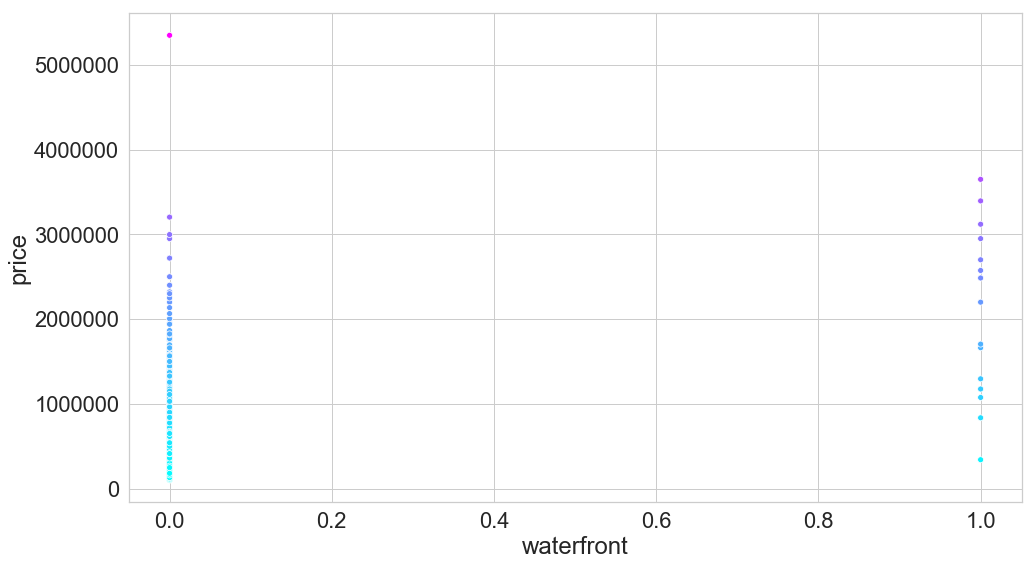

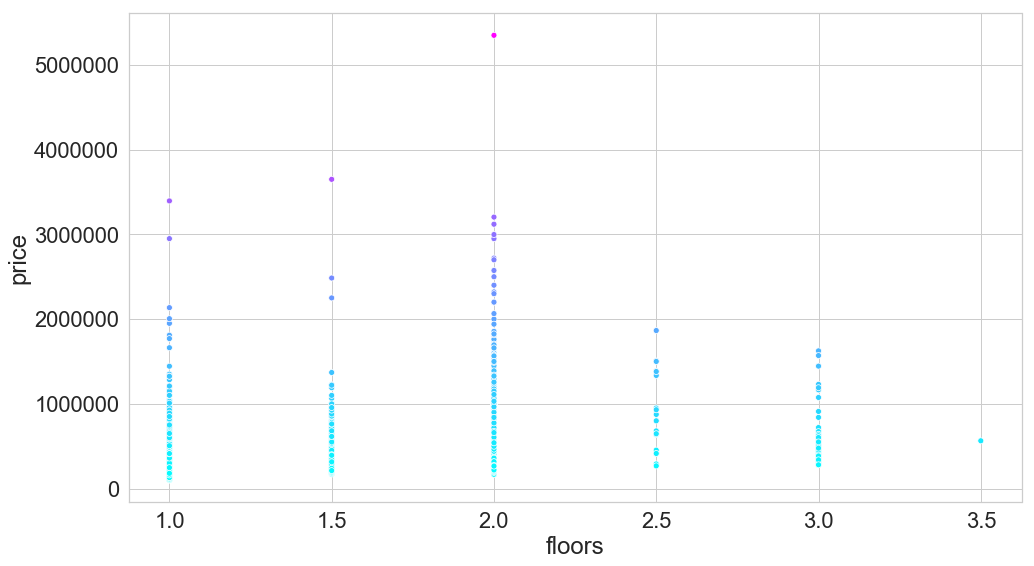

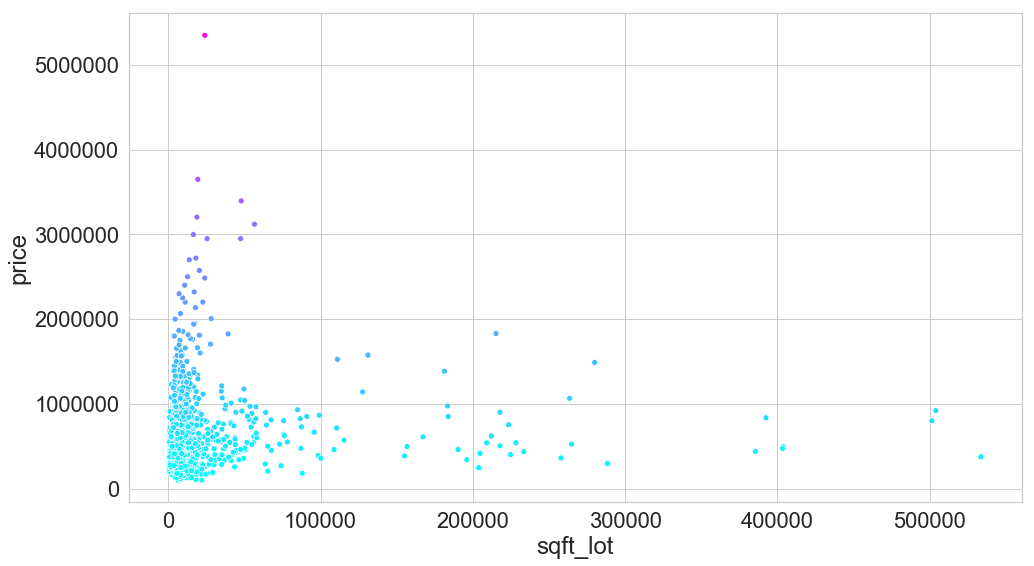

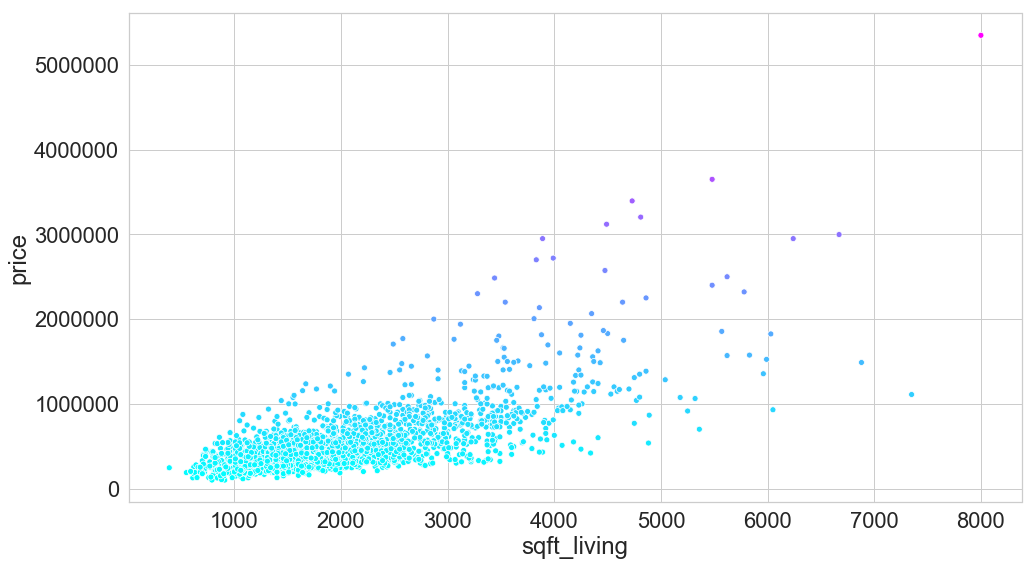

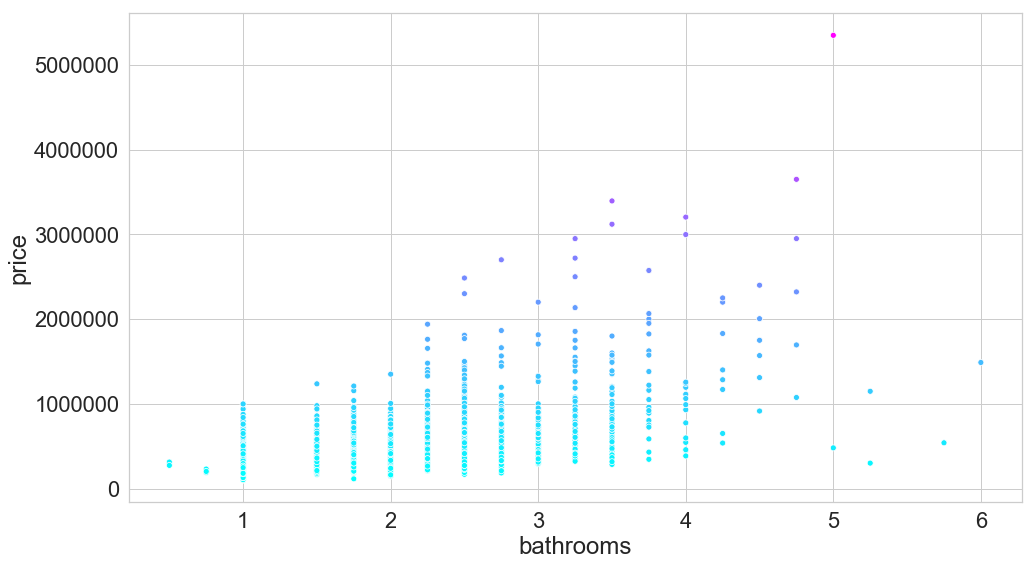

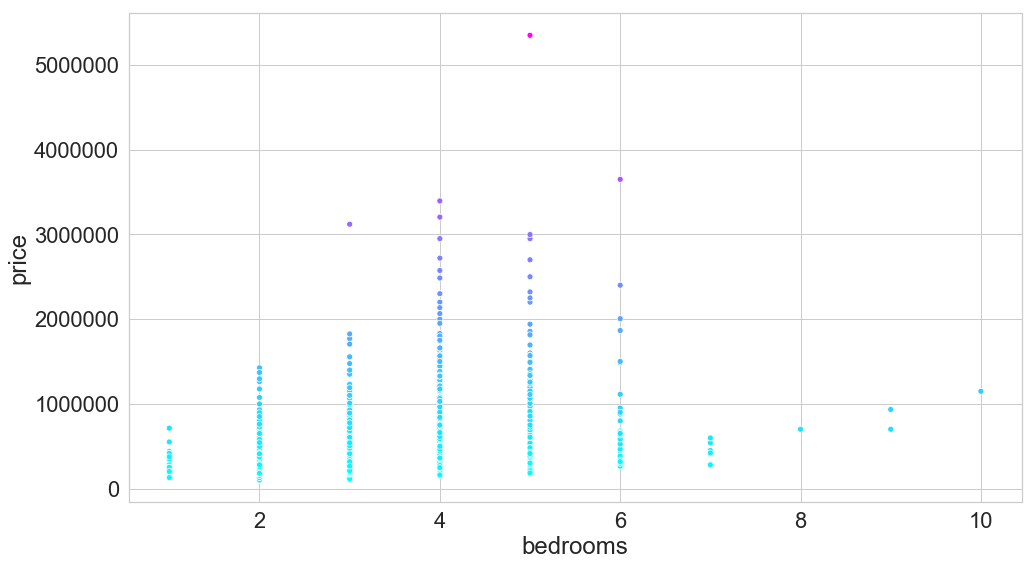

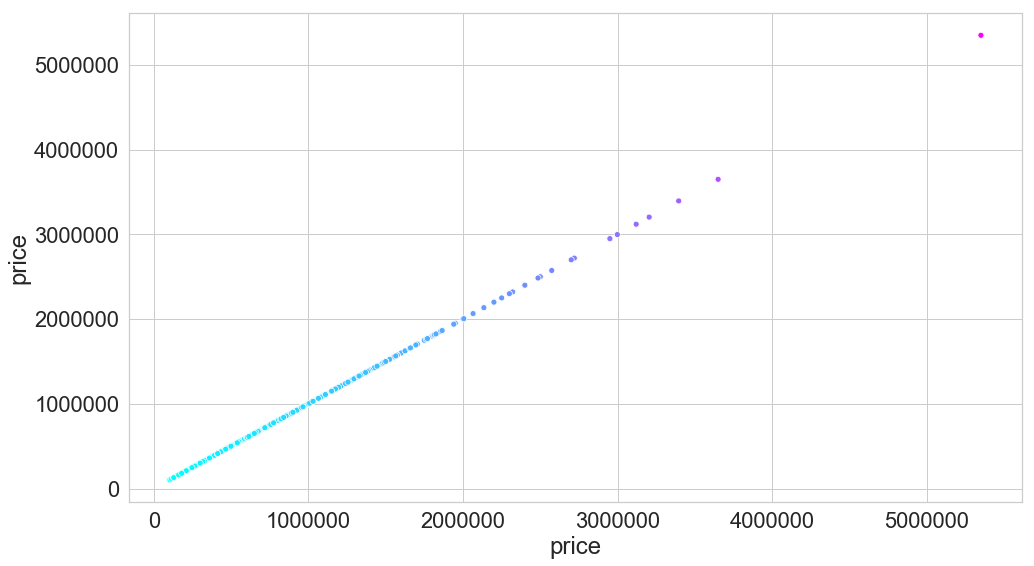

In [21]:
# LOOP over features (columns AKA x values) to plot
for feature in kc_housing_df.columns:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, y='price', 
                     hue='price', 
                     palette='cool', legend=False)

### Set training and test data

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(kc_housing.data, kc_housing.target, random_state=11)
# train_test_split(independent variables (x), dependent variable (y) - what trying to predict!)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (16209, 18)
Shape of testing  set = (5404, 18)


### Train model

In [23]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# LOOP through columns (e.g. x values)
for i, name in enumerate(kc_housing.feature_names):
    print(f'{name:>11}: {linear_regression.coef_[i]:24.6f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.6f}')

 sqft_lot15:                -0.333413
sqft_living15:                18.180547
       long:           -210602.296266
        lat:            606909.064937
    zipcode:              -558.258400
yr_renovated:                17.689310
   yr_built:             -2686.126000
sqft_basement:                37.858475
 sqft_above:                74.489539
      grade:             93962.905584
  condition:             25986.190442
       view:             52695.551020
 waterfront:            597042.041544
     floors:              5466.133172
   sqft_lot:                 0.103893
sqft_living:               112.348014
  bathrooms:             45114.948732
   bedrooms:            -36463.677330

y-intercept:          4766875.074695


### Test the model

In [24]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.7
     correlation coefficient = 0.8


### Visualize the expected vs. predicted prices 

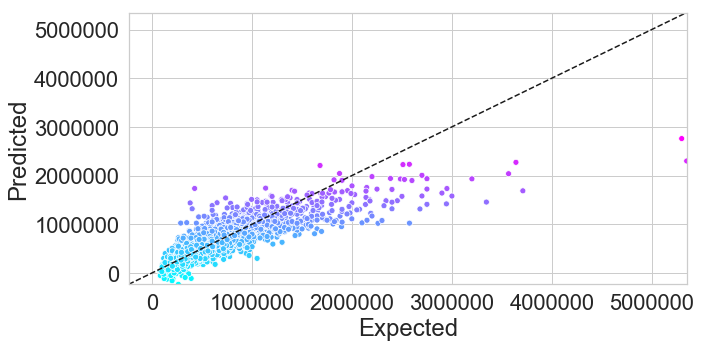

In [25]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(10, 5))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

### Define independent variables

In [26]:
p_sqft_lot15    = 7500
p_sqft_living15 = 2570
p_long          = -122.26
p_lat           = 47.51
p_zipcode       = 98178
p_yr_renovated  = 0
p_yr_built      = 1965
p_sqft_basement = 0
p_sqft_above    = 2170
p_grade         = 6
p_condition     = 5
p_view          = 1
p_waterfront    = 0
p_floors        = 2.0
p_sqft_lot      = 7500
p_sqft_living   = 2050
p_bathrooms     = 2.00
p_bedrooms      = 3

### Use model to predict a home price in King County, WA

In [36]:
print(f'Predicted Price: {linear_regression.predict([[p_sqft_lot15 ,p_sqft_living15 ,p_long ,p_lat ,p_zipcode ,p_yr_renovated ,p_yr_built ,p_sqft_basement ,p_sqft_above ,p_grade ,p_condition ,p_view ,p_waterfront ,p_floors ,p_sqft_lot ,p_sqft_living ,p_bathrooms ,p_bedrooms ]])}')

Predicted Price: [437564.12636139]


## Sources (loading my own datasets):
##### https://stackoverflow.com/questions/53090837/how-to-transform-my-csv-file-into-this-scikit-learn-dataset
##### https://stackoverflow.com/questions/42432850/how-to-create-my-own-datasets-using-in-scikit-learn
##### https://www.tutorialspoint.com/python_pandas/python_pandas_series.htm
##### https://scikit-learn.org/stable/datasets/#general-dataset-api
##### https://datatofish.com/multiple-linear-regression-python/

scikit-learn load and model per Deitel & Associates, Inc. and Pearson Education, Inc. Reserved. 